In [1]:
import numpy as np
import pandas as pd

1. Zbiór danych (minimum 6 klas).
Sugerowana strona ze zbiorami danych (może być inne źródło, jeżeli prowadzący wyrazi zgodę): https://archive.ics.uci.edu.

In [2]:
names = ['elev','azimuth','slope','hdthnsef','vdthnsef','hdtr','hillshade9','hillshade_noon','hillshade3','hdtfp','wilderness1','wilderness2','wilderness3','wilderness4']
for i in range(40):
    names.append('soil'+str(i+1))
names.append('class')

data = pd.read_csv("covtype.data", names = names)

# normalizacja
norm_names = ['elev','azimuth','slope','hdthnsef','vdthnsef','hdtr','hillshade9','hillshade_noon','hillshade3','hdtfp']

for i in norm_names:
    data[i] = (data[i]-data[i].min())/(data[i].max()-data[i].min())

In [3]:
data.isna().sum()
data.dropna()

elev              0
azimuth           0
slope             0
hdthnsef          0
vdthnsef          0
hdtr              0
hillshade9        0
hillshade_noon    0
hillshade3        0
hdtfp             0
wilderness1       0
wilderness2       0
wilderness3       0
wilderness4       0
soil1             0
soil2             0
soil3             0
soil4             0
soil5             0
soil6             0
soil7             0
soil8             0
soil9             0
soil10            0
soil11            0
soil12            0
soil13            0
soil14            0
soil15            0
soil16            0
soil17            0
soil18            0
soil19            0
soil20            0
soil21            0
soil22            0
soil23            0
soil24            0
soil25            0
soil26            0
soil27            0
soil28            0
soil29            0
soil30            0
soil31            0
soil32            0
soil33            0
soil34            0
soil35            0
soil36            0


2. Podział zbioru danych na treningowy i testowy.
Parametry podziału (proporcje) powinny być konfigurowalne.

In [4]:
y = data['class']
X = data.drop(['class'], axis=1)


3. Wstępna analiza danych.
Ile jest próbek każdej klasy, ile jest cech, czy dane są znormalizowane, czy wymagają normalizacji, czy są inne czynności jakie należy wykonać, statystyki (tylko istotne - takie które wpływają na dalsze kroki).

- 12 cech
- 7 klas
- columna soil i wilderness są cechami kategorycznymi:
    - soil zawiera 40 kategorii
    - wilderness 4

In [5]:
# zliczenie wielkości klas
X = np.array(X)
y = np.array(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=244810)

for i in range(7):
    print("Ilość próbek klasy ",i+1,": ",len(y[y[0:] == i+1]))

Ilość próbek klasy  1 :  211840
Ilość próbek klasy  2 :  283301
Ilość próbek klasy  3 :  35754
Ilość próbek klasy  4 :  2747
Ilość próbek klasy  5 :  9493
Ilość próbek klasy  6 :  17367
Ilość próbek klasy  7 :  20510


5. Selekcja cech.
Opis jakie metody selekcji cech zastosowano, dlaczego wybrano taką metodę a nie inną.

In [6]:
abs(data.corr()['class']).sort_values(ascending=False)

class             1.000000
wilderness4       0.323200
elev              0.269554
soil10            0.243876
wilderness1       0.203913
soil38            0.160170
soil39            0.155668
hdtr              0.153450
slope             0.148285
soil22            0.141746
soil23            0.135055
soil40            0.128351
soil29            0.124933
soil2             0.118135
soil6             0.112958
hdtfp             0.108936
soil4             0.099672
hillshade_noon    0.096426
soil1             0.090828
soil17            0.090582
vdthnsef          0.081664
soil35            0.080315
soil37            0.080271
soil5             0.077890
soil32            0.075562
soil24            0.068746
soil3             0.068064
wilderness3       0.066846
soil14            0.065562
soil31            0.065347
soil33            0.062502
hillshade3        0.048290
wilderness2       0.048059
soil19            0.036452
hillshade9        0.035415
soil11            0.035379
soil20            0.028665
s

In [7]:
features = [
    names.index('wilderness4'),
    names.index('elev'),
    names.index('soil10'),
    names.index('wilderness1'),
]
features

[13, 0, 23, 10]

In [8]:
X_train_new = X_train[:,features]

In [12]:
from sklearn.neighbors import KNeighborsClassifier
# NN
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train_new, y_train)
X_test_new = X_test[:,features]
neigh.score(X_test_new,y_test)

KNeighborsClassifier(n_neighbors=1)

0.5723001987900485

In [14]:
# knn 3
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_new, y_train)
neigh.score(X_test_new,y_test)

0.6129962221285165

In [15]:
from sklearn.neighbors import NearestCentroid
nm = NearestCentroid()
nm.fit(X_train_new, y_train)
nm.score(X_test_new,y_test)

0.35843308692546666

# dla wszystkich klas


In [16]:
# NN
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
neigh.score(X_test,y_test)

0.9419550269786494

In [17]:
# knn
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test,y_test)

0.9406383656187878

In [18]:
# nm
nm = NearestCentroid()
nm.fit(X_train, y_train)
nm.score(X_test,y_test)

0.38685748216483223

In [19]:
features = [
    names.index('wilderness4'),
    names.index('elev'),
    names.index('soil10'),
    names.index('wilderness1'),
    names.index('soil38'),
    names.index('soil39'),
]
features

[13, 0, 23, 10, 51, 52]

In [20]:
X_train_new = X_train[:,features]
X_test_new = X_test[:,features]
# nn
nn = KNeighborsClassifier(n_neighbors=1)
nn.fit(X_train_new, y_train)
nn.score(X_test_new,y_test)

0.587626825469222

In [21]:
# knn 3
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_new, y_train)
neigh.score(X_test_new,y_test)

0.6217739645275939

In [22]:
# nm
nm = NearestCentroid()
nm.fit(X_train_new, y_train)
nm.score(X_test_new,y_test)

0.3468757261000146

In [30]:
from sklearn import metrics
#pred = neigh.predict(X_test_new)

cm = metrics.confusion_matrix(y_test, pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.set_title('knn')
disp.plot()
# cm.ax_.set_title('knn')
# cm.im_.colorbar.remove()

AttributeError: 'ConfusionMatrixDisplay' object has no attribute 'set_title'

[Text(0, 0, 'a'),
 Text(0, 1, 'b'),
 Text(0, 2, 'c'),
 Text(0, 3, 'd'),
 Text(0, 4, 'e'),
 Text(0, 5, 'f'),
 Text(0, 6, 'g')]

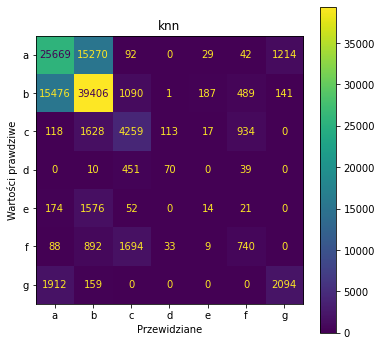

In [45]:
import matplotlib.pyplot as plt
from sklearn import metrics
fig, ax = plt.subplots(1, 1,figsize=(6,6))
cm = metrics.confusion_matrix(y_test, pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax) 
disp.ax_.set_title('knn')
disp.ax_.set_ylabel('Wartości prawdziwe')
disp.ax_.set_xlabel('Przewidziane')
disp.ax_.set_xticklabels(['a','b','c','d','e','f','g'])
disp.ax_.set_yticklabels(['a','b','c','d','e','f','g'])
